# Monte Carlo

### Peter Onyisi
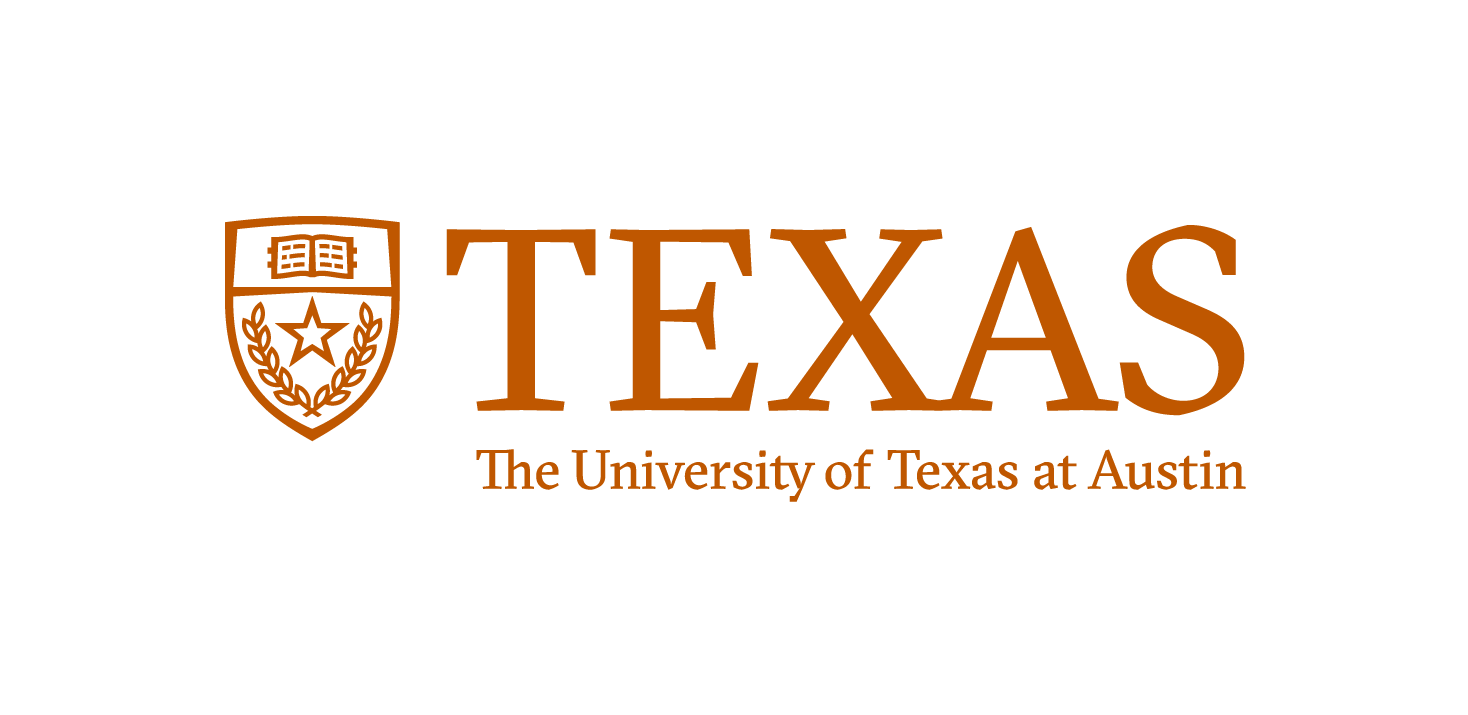

"Monte Carlo" (MC) is used to refer to a general family of methods for obtaining approximate answers to questions by using random numbers instead of exact analytic methods. MC is an extremely powerful technique for a class of problems where an analytic solution may be very difficult or impossible. The downside is that it doesn't give you exact answers and may require enormous computing resources.

The examples we have done of coin flips are an example of Monte Carlo: we have been trying to evaluate things like "what are the statistical properties of a set of coin flips?" In this case there's an obvious statistical aspect to the problem. But let's look at MC techniques applied to a problem which is perhaps less obvious.

### Evaluate &pi;
We will show two ways to evaluate pi, using Monte Carlo (random sampling) techniques.

In [95]:
# import Python packages
import numpy
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
import math
import tqdm.notebook

Our first method: the area of a circle with radius 1 is $\pi$, and the area of a square of edge 2 is 4 (and the square completely covers the circle). Choose a random point in a square of edge 2; then it will be inside a circle of radius 1 with probability $\pi/4$.
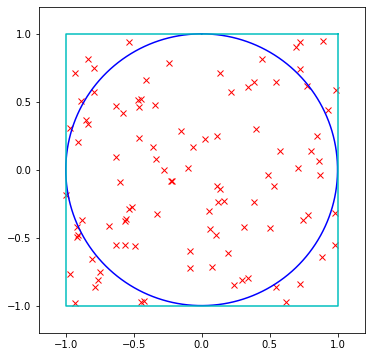

In [97]:
# Python allows us to use "_" inside a number as a way to separate it into blocks, has no meaning otherwise
N_attempts = 2_000_000
results = numpy.zeros(N_attempts)

# x and y positions are independent random numbers. Generate N_attempts numbers from -1 to 1 for both
x_values = numpy.random.uniform(-1, 1, N_attempts)
y_values = numpy.random.uniform(-1, 1, N_attempts)

print("done generating random numbers")

# there are magic numpy ways to make this faster! see later
for attempt in range(N_attempts):
    # is x**2 + y**2 <= 1 ?
    if x_values[attempt]**2 + y_values[attempt]**2 <= 1:
        results[attempt] = 1
        # otherwise leave it as zero
        
# so now "results" has 1 every time the random point was in the circle, and 0 when it wasn't, so the fraction inside the
# circle is the sum of the array elements divided by the number of elements - i.e., the mean value of the array
print(f"Fraction passing: {results.mean()}")
print(f"Our estimate of pi: {results.mean()*4}")
print(f"The true value of pi: {math.pi}")

done generating random numbers
Fraction passing: 0.7855775
Our estimate of pi: 3.14231
The true value of pi: 3.141592653589793


In [98]:
# Faster way to check if the points are inside the circle
# General rule is to avoid "for" loops if a simple numpy expression can be written
results_2 = numpy.zeros(N_attempts)
# the following means: "for the indices where the point satisifies x**2 + y**2 <= 1, set results_2 to 1"
results_2[x_values**2 + y_values**2 <= 1] = 1
print(f"Fraction passing: {results_2.mean()}")
print(f"Our estimate of pi: {results_2.mean()*4}")
print(f"The true value of pi: {math.pi}")

Fraction passing: 0.7855775
Our estimate of pi: 3.14231
The true value of pi: 3.141592653589793


In [99]:
# Even faster - skip filling the results_2 array, since we don't actually care *which* points are inside the
# circle, just how many there are
# when the expression is True, sum counts it as 1, and when the expression is False, sum counts it as zero

count = numpy.sum(x_values**2 + y_values**2 <= 1)
print(f"Fraction passing: {count/N_attempts}")
print(f"Our estimate of pi: {count/N_attempts*4}")
print(f"The true value of pi: {math.pi}")

Fraction passing: 0.7855775
Our estimate of pi: 3.14231
The true value of pi: 3.141592653589793


Our second method: the integral of the function $\int_0^1 \sqrt{1-x^2} dx$ is $\pi/4$ (it is the area of one quadrant of a circle). Do a Monte Carlo integration of the function by randomly choosing points along the $x$ axis in the range $[0,1]$ and adding the value of $\sqrt{1-x^2}$, multiplying by the width of the range we're chosing points over, and dividing by the number of random points we've chosen.
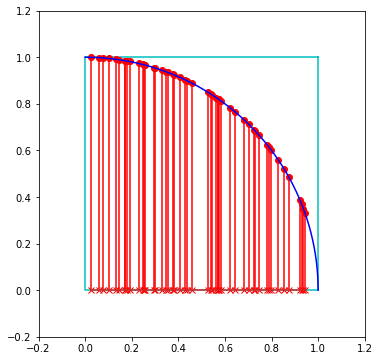

In [100]:
# The "slow" way ...

N_attempts = 2_000_000
x_values = numpy.random.uniform(0, 1, N_attempts)
results = numpy.zeros(N_attempts)

print("done generating random numbers")

for attempt in range(N_attempts):
    results[attempt] = math.sqrt(1-x_values[attempt]**2)
    
# our estimate of the integral (=pi/4) is the total value of results, times the range we're choosing random numbers over
# (1), divided by the number of attempts (= the mean result * 1)
print(f"Our estimate of pi: {results.mean()*4}")
print(f"The true value of pi: {math.pi}")

done generating random numbers
Our estimate of pi: 3.1415547118561618
The true value of pi: 3.141592653589793


In [101]:
# the "fast" way, using numpy tricks
results_2 = numpy.sqrt(1-x_values**2) # evaluate all together
print(f"Our estimate of pi: {results_2.mean()*4}")
print(f"The true value of pi: {math.pi}")

Our estimate of pi: 3.1415547118561618
The true value of pi: 3.141592653589793


How wrong are our estimates? Let's repeat the procedure a number of times, with different random numbers, and see what the distribution of answers looks like. (Let's do it the "fast" way, we don't have all day.)

First method (points in circle):

In [102]:
N_tries = 500
N_attempts = 2_000_000
estimates = numpy.zeros(N_tries)
for this_try in tqdm.notebook.tqdm(range(N_tries)):
    x_values = numpy.random.uniform(-1, 1, N_attempts)
    y_values = numpy.random.uniform(-1, 1, N_attempts)
    estimates[this_try] = numpy.sum(x_values**2 + y_values**2 <= 1)/N_attempts*4

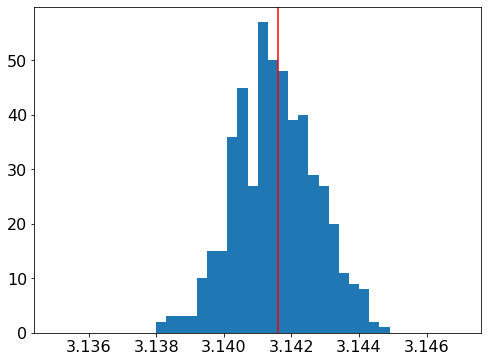

Standard deviation of results: 0.001201413271744172


In [103]:
plt.hist(estimates, bins=40, range=(3.135,3.147))
plt.axvline(math.pi, 0, 1, color='r') # plot the true value of pi
plt.show()
print(f"Standard deviation of results: {estimates.std(ddof=1)}")

Second method (numerical integration):

In [107]:
N_tries = 50
N_attempts = 8_000_000
estimates = numpy.zeros(N_tries)
for this_try in tqdm.notebook.tqdm(range(N_tries)):
    x_values = numpy.random.uniform(0, 1, N_attempts)
    estimates[this_try] = numpy.sum(numpy.sqrt(1-x_values**2))/N_attempts*4

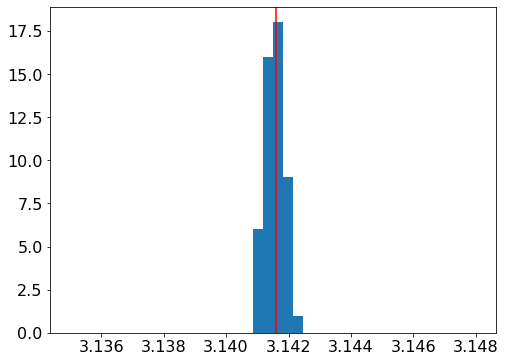

Standard deviation of results: 0.0003458665956723652


In [108]:
plt.hist(estimates, bins=40, range=(3.135,3.148))
plt.axvline(math.pi, 0, 1, color='r') # plot the true value of pi
plt.show()
print(f"Standard deviation of results: {estimates.std(ddof=1)}")

We see that for the same number of random numbers generated, we get better precision through the integration method.

### Generating random variables according to a distribution


We may want to generate random numbers $x_0, x_1, x_2, \ldots$ with probability proportional to a given function $f(x)$. So, for example, maybe we want to generate integers that would have the same distribution as the number of heads in 50 coin flips (a binomial distribution). There are a couple of methods we can use with arbitrary probability distributions. They have the very nice feature that we don't need a properly normalized PDF to generate them; we just need something proportional to the probability distribution.

### Accept/reject
One simple technique that works with almost all distributions - but can be computationally inefficient - is called accept-reject sampling.  It works like this in one dimension:
* your probability distribution $P(x)$ needs to be zero outside a finite range of $x$: say $x_\mathrm{min}$ to $x_\mathrm{max}$.  You also need to know a number $M$ such that $P(x) < M$ for the whole range.  ($M$ does not need to be the smallest such number.)
* in a loop, until you've generated enough numbers:
 * generate a random number $x_\mathrm{test}$ from a uniform distribution from $x_\mathrm{min}$ to $x_\mathrm{max}$: any random number generator can provide this.  (At worst it'll provide numbers in (0,1) and you'll have to scale them to the appropriate range.)
 * compute $y = P(x_\mathrm{test})/M$.
 * generate a random number $y_\mathrm{test}$ from a uniform distribution from 0 to 1.
 * if $y_\mathrm{test} < y$, you _accept_ $x_\mathrm{test}$ and add it to your sequence. If $y \ge y_\mathrm{test}$ you _reject_ $x_\mathrm{test}$.
 * go back to start of loop to try again.
 

In [109]:
# Implementation of accept/reject sampling for a continuous variable.
# Pass the Python function, the range of potential x values as a tuple (xmin, xmax), and the maximum value for f(x) to assume
# Object returned by function can return an infinite string of values of x
# this is a "generator" function: result can be used as an iterator
# this is indicated by the "yield" in place of "return"
def accept_reject(func, rng, maxval):
    from random import uniform
    while True:
        xtest = uniform(*rng)
        y = func(xtest)/maxval
        if y > 1:
            print(f"Problem: function ({y*maxval}) has exceeded maxval {maxval} for x {xtest}")
        ytest = uniform(0,1)
        if ytest < y:
            yield xtest
            
# Implementation of accept/reject sampling for an integer-valued variable.
# Like above, except that x will be generated for integers in the range (xmin, xmax), including the endpoints.
def accept_reject_integer(func, rng, maxval):
    from random import randint, uniform
    while True:
        xtest = randint(*rng)
        y = func(xtest)/maxval
        if y > 1:
            print(f"Problem: function ({y*maxval}) has exceeded maxval {maxval} for x {xtest}")
        ytest = uniform(0,1)
        if ytest < y:
            yield xtest

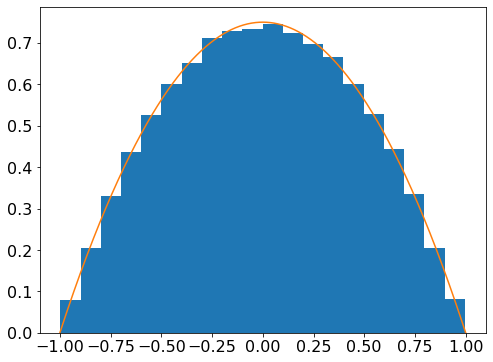

In [110]:
# example. some arbitrary PDF:
def quadratic(x):
    return 0.75*(1.-x*x) if -1 < x < 1 else 0

# some points:
from itertools import islice
generated_points = list(tqdm.notebook.tqdm(islice(accept_reject(quadratic, (-1,1), 1), 50000)))

# compare histogram of generated points to PDF
plt.hist(generated_points, bins=20, density=True)
plt.plot(numpy.linspace(-1,1,1000), numpy.frompyfunc(quadratic, 1, 1)(numpy.linspace(-1,1,1000)))
plt.show()


Some points: [29, 22, 32, 20, 26, 21, 25, 24, 32, 24]


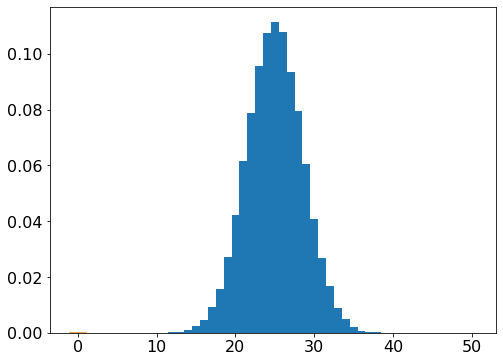

In [111]:
# return Stirling's approximation for log x! - gets better at high x, but even for x=1 it is correct to 0.081 
def stirling(x):
    # numpy.log is natural log
    # x should be an integer. replace 0 by 1, since log 0! = log 1!; maximum can be whatever
    xnew = numpy.clip(x, 1, None)
    return xnew*numpy.log(xnew)-xnew+0.5*numpy.log(2*math.pi*xnew)

# example. generate "number of coin flips" distribution without actually generating any coin flips.
def binomial_distribution(k, N, p):
    return numpy.exp(stirling(N) - stirling(k) - stirling(N-k) + k*numpy.log(p) + (N-k)*numpy.log(1-p))

def this_binomial_prob(k):
    return binomial_distribution(k, 50, 0.5)

# some points:
from itertools import islice
generated_points = list(tqdm.notebook.tqdm(islice(accept_reject_integer(this_binomial_prob, (0,50), 0.12), 50000), total=50000))

# print first 10:
print('Some points:', generated_points[:10])

# compare histogram of generated points to PDF
plt.hist(generated_points, range=(-0.5, 50.5), bins=51, density=True)
plt.plot(numpy.linspace(-1,1,1000), this_binomial_prob(numpy.linspace(-1,1,1000)))
plt.show()

### Metropolis-Hastings algorithm

The accept-reject method can have problems for multidimensional problems, if the probability distribution is highly peaked in a small volume (you have to choose a high value for $M$, but then almost all sampled events have probability nearly zero). One way of trying to address this is to build some memory into the way points are sampled: you find places with high probability, and for the next sample you consider nearby points (where the probability is likely to still be high). This is called a _Markov Chain Monte Carlo_ (MCMC) - a _Markov Chain_ is just a sequence of random variables where the next value depends on the previous one in some determined way (such as a random walk, where your position after $N+1$ steps is one unit away from your position after $N$ steps, but in a random direction).  Here we outline a popular MCMC algorithm, the Metropolis-Hastings (MH) algorithm.

* We always start from an initial value $x$.
* You need a _proposal function_ $g$ that can generate a possible new (random) value $x_{new}$ based on the current value of $x$. This should be an easy function to generate - uniform distribution, normal distribution, etc. are just fine. For what is described below, the function $g$ should be symmetric: $g(x_{new} ; x)$ should be the same as $g(x; x_{new})$. (This means that the probability of proposing $x_{new}$, if we are currently at $x$, should be the same as of proposing $x$ if we are at $x_{new}$.)
* Generate $x_{new}$. Compute the _acceptance ratio_ $\alpha = f(x_{new})/f(x)$; this is ratio of probabilities for $x_{new}$ and $x$.
* If $\alpha > 1$ (i.e. $x_{new}$ is more likely than $x$), then $x_{new}$ is accepted as the next value. If $\alpha < 1$, then accept $x_{new}$ with probability $\alpha$; if it is accepted, then $x_{new}$ is the new value, otherwise $x$ is (the current value is repeated).
* repeat, using the result of the previous step as the new initial value.

Intuitively, what MH does is generate a new point near the current point. If the new point is _more_ likely than the previous one, we move to the new point. If the new point is _less_ likely, we still want to have some chance of moving there, since we want to generate improbable events sometimes.  It turns out that the procedure above will wind up generating points with the appropriate probabilities, if it's run long enough.

The MH algorithm can do a really good job if the proposal function is tuned appropriately, though it does have some drawbacks. The main one is that the points in the sequence are _correlated_ : the next point is likely to be near the previous one. So short sample sequences from the algorithm may not be enough to visit all relevant values of $x$. It is also possible to use a very unlikely value of $x$ at the beginning and have the algorithm need to take time to move away from it, so it is usually good to discard the beginning of the sequence if you aren't confident it is starting in a high probability region.

In [112]:
def metropolis(func, proposalfunc, initial):
    from random import uniform
    x = initial
    fx = func(x) # to use later
    while True:
        yield x
        # use proposal function to propose a new x
        xnew = proposalfunc(x)
        # what is f(x)?
        fxnew = func(xnew)
        # determine "acceptance ratio"
        alpha = fxnew/fx
        if alpha > 1:
            # accept automatically
            x = xnew; fx = fxnew
        else:
            ytest = uniform(0, 1)
            if ytest < alpha: # accept
                x = xnew; fx = fxnew
            # otherwise take existing point
            
# MH algorithm code for integers is the same, since new x values come from proposal function

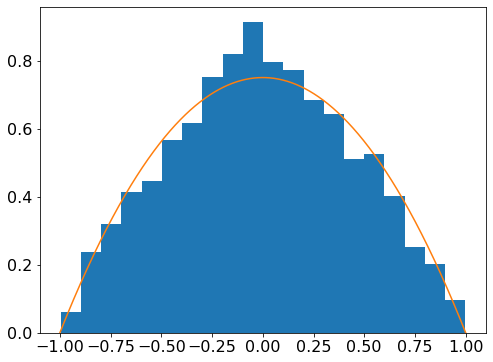

In [123]:
# proposal function: uniform in a range in each direction around x
def proposalfunc(x):
    import random
    return random.uniform(x-0.3, x+0.3)

# some points:
NPOINTS=500000
from itertools import islice
generated_points = list(tqdm.notebook.tqdm(islice(metropolis(quadratic, proposalfunc, -.8), NPOINTS), total=NPOINTS))

# compare histogram of generated points to PDF
plt.hist(generated_points, bins=20, density=True)
plt.plot(numpy.linspace(-1,1,1000), numpy.frompyfunc(quadratic, 1, 1)(numpy.linspace(-1,1,1000)))
plt.show()

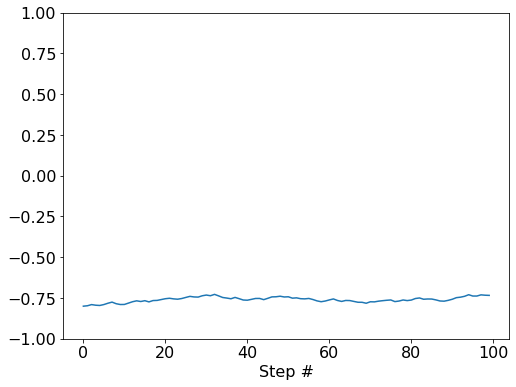

In [124]:
# show the evolution of the sampled x value at the beginning of the chain
plt.plot(range(100), generated_points[:100])
plt.ylim(-1,1)
plt.xlabel('Step #')
plt.show()